# DS - 001 - Learning Project:  Bias and Variance Tradeoff

In this notebook, we talk a little bit about the *bias-variance trade-off*, one important topic when we try to measure our model performance.

## 1. Libraries

In [2]:
# The basic ones
import pandas as pd
import numpy as np

# Importing sklearn model library
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score #the last ones are for cross validation
from sklearn.preprocessing import StandardScaler #to make the feature scaling
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, r2_score, precision_score, recall_score, classification_report, confusion_matrix

# For plotting the linear regressions
import seaborn as sns
import matplotlib.pyplot as plt

import random
import math

from scipy.interpolate import make_interp_spline, BSpline


## 2. Dataset

This is a fancy way to generate random data that follow a function we designed for our example.

In [3]:
def generate_sample_data(f, first, last, size=100):
  x_arr = []
  y_arr = []
  for _ in range(size):
    x = random.random()*(last-first)
    y = f(x)
    x_arr.append(x)
    y_arr.append(y)

  return x_arr,y_arr

# Based on a function we could designed we call the generate_sample_data method
mu, sigma = 0, 0.1
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)

x,y = generate_sample_data(f, 0, 2, size=20)

#Creating the dataset for the explanation
dataset = pd.DataFrame({"x":np.array(x),"y":np.array(y)}).sort_values(by='x')
dataset.head()

x = np.array(dataset['x'])
y = np.array(dataset['y'])

## 3. Constructing the regression models

#### 3.1 Linear Regression

Results Summary - Degree 1: 
----------------------------
R2 Score: 0.0494
Mean Squared Error: 0.604344
Bias Squared: 0.562958
Variance: 0.031386



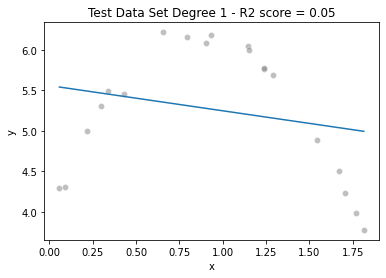

In [57]:
# Sklearn demands to have a 2D array, let´s reshape the array
data = x.reshape((-1,1))

# Creating the Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(data,y)

# Making predictions
y_pred = linear_model.predict(data)

# Calculating some metrics including bias and variance
r2 = r2_score(y,y_pred)

irreducible_error = 0.01

# Mean Squared Error
mse = np.mean(( y - y_pred ) ** 2)

# Sum of Squared Error
sse = np.mean((np.mean(y_pred) - y)**2 )

# Variance
var = np.mean(y_pred ** 2) - np.mean(y_pred) ** 2

# Bias
bias_2 = mse - var - irreducible_error

# Results Summary
print("Results Summary - Degree 1: ")
print("----------------------------")
print("R2 Score: %.4f" % r2)
print("Mean Squared Error: %.6f" % mse)
print("Bias Squared: %.6f" % bias_2)
print("Variance: %.6f\n" % var)

ax = sns.scatterplot(data=dataset, x="x", y="y",
                     color="gray", alpha=0.5)
ax.plot(data, y_pred)
_ = ax.set_title(f"Test Data Set Degree 1 - R2 score = {r2:.2f}")

As we can see, this model is pretty bad, we can even notice on the graph and on the *mse*. In this cases we are talking about that your model is **underfitting**, when your model cannot explain your target (no matter if you are using your train dataset, your test dataset or even your future inputs).

**Remember**:
- If you have high bias instead of high variance, your model is underfitting.

- It was pretty obvious that the linear model will not fit for these context, but it is part of the explanation :)

#### 3.2 Polynomial Regression (Degree 2)

Results Summary - Degree 2: 
----------------------------
R2 Score: 0.9896
Mean Squared Error: 0.006623
Bias Squared: -0.632484
Variance: 0.629107



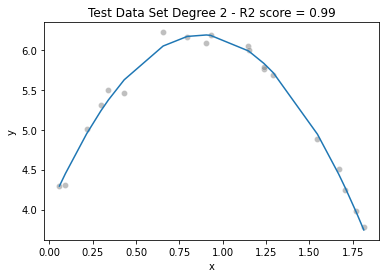

In [58]:
#Reshaping dataset before poly features
dataset_poly = x.reshape((-1,1))

#Create the polinomial features
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

# Fit and transform
poly_features = polynomial_converter.fit(dataset_poly)
poly_features = polynomial_converter.transform(dataset_poly)

linear_model = LinearRegression()
linear_model.fit(poly_features,y)

y_pred = linear_model.predict(poly_features)

r2 = r2_score(y,y_pred)

irreducible_error = 0.01

# Mean Squared Error
mse = np.mean(( y - y_pred ) ** 2)

# Sum of Squared Error
sse = np.mean((np.mean(y_pred) - y)**2 )

# Variance
var = np.mean(y_pred ** 2) - np.mean(y_pred) ** 2

# Bias
bias_2 = mse - var - irreducible_error

# Results Summary
print("Results Summary - Degree 2: ")
print("----------------------------")
print("R2 Score: %.4f" % r2)
print("Mean Squared Error: %.6f" % mse)
print("Bias Squared: %.6f" % bias_2)
print("Variance: %.6f\n" % var)

ax = sns.scatterplot(data=dataset, x="x", y="y",
                     color="gray", alpha=0.5)
ax.plot(x, y_pred)
_ = ax.set_title(f"Test Data Set Degree 2 - R2 score = {r2:.2f}")

Seems to fit 'right', not well but could be sufficient. Let's try a higher degree.

#### 3.2 Polynomial Regression (Degree 10) - maybe I'm exagerating jeje

Results Summary - Degree 10:
----------------------------
R2 Score: 0.9952
Mean Squared Error: 0.003025
Bias Squared: -0.639679
Variance: 0.632704



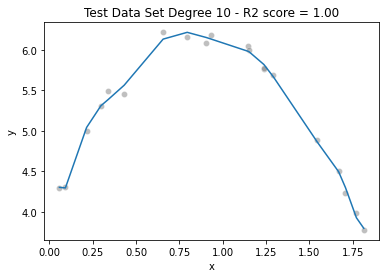

In [59]:
#Reshaping dataset before poly features
dataset_poly = x.reshape((-1,1))

#Create the polinomial features
polynomial_converter = PolynomialFeatures(degree=10,include_bias=False)

# Fit and transform
poly_features = polynomial_converter.fit(dataset_poly)
poly_features = polynomial_converter.transform(dataset_poly)

# Creating the model
linear_model = LinearRegression()
linear_model.fit(poly_features,y)

y_pred = linear_model.predict(poly_features)

r2 = r2_score(y,y_pred)

irreducible_error = 0.01

# Mean Squared Error
mse = np.mean(( y - y_pred ) ** 2)

# Sum of Squared Error
sse = np.mean((np.mean(y_pred) - y)**2 )

# Variance
var = np.mean(y_pred ** 2) - np.mean(y_pred) ** 2

# Bias
bias_2 = mse - var - irreducible_error

# Results Summary
print("Results Summary - Degree 10:")
print("----------------------------")
print("R2 Score: %.4f" % r2)
print("Mean Squared Error: %.6f" % mse)
print("Bias Squared: %.6f" % bias_2)
print("Variance: %.6f\n" % var)

ax = sns.scatterplot(data=dataset, x="x", y="y",
                     color="gray", alpha=0.5)
ax.plot(x, y_pred)
_ = ax.set_title(f"Test Data Set Degree 10 - R2 score = {r2:.2f}")

Awesome! Seems to fit 'better' our dataset, however the bad news is that our model is **overfitting**.

That means maybe your model explains the variability of your training set very well, but you will see the the test set or the new incoming datasets won't have good results.

**Remember**:
- If you have high variance instead of high bias, your model is overfitting.

- Actually, your model is constructed including that 'noise' we put at the beginning, which is not what we want because it's noise!

### Calculating Bias and Variance for 150 models

In [65]:
#For bias and variance plot, let's create 2 arrays
bias_2_array = []
vars_array = []
exps = np.arange(0, 100, 1)

# Let's make a loop for the polynomial features
dataset_poly = x.reshape((-1,1))

# Running 150 different polynomial models
for i in range(1,101):
  polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)

  # Fit and transform
  poly_features = polynomial_converter.fit(dataset_poly)
  poly_features = polynomial_converter.transform(dataset_poly)

  # Creating the model
  linear_model = LinearRegression()
  linear_model.fit(poly_features,y)

  y_pred = linear_model.predict(poly_features)
  
  mse = mean_squared_error(y,y_pred)

  r2 = r2_score(y,y_pred)

  irreducible_error = 0.01

  # Mean Squared Error
  mse = np.mean(( y - y_pred ) ** 2)

  # Sum of Squared Error
  sse = np.mean((np.mean(y_pred) - y)**2 )

  # Variance
  var = np.mean(y_pred ** 2) - np.mean(y_pred) ** 2

  # Bias
  bias_2 = mse - var - irreducible_error

  bias_2_array.append(bias_2)
  vars_array.append(var)

  print(f"Model with polynomial features degree {i} processed.")

Model with polynomial features degree 1 processed.
Model with polynomial features degree 2 processed.
Model with polynomial features degree 3 processed.
Model with polynomial features degree 4 processed.
Model with polynomial features degree 5 processed.
Model with polynomial features degree 6 processed.
Model with polynomial features degree 7 processed.
Model with polynomial features degree 8 processed.
Model with polynomial features degree 9 processed.
Model with polynomial features degree 10 processed.
Model with polynomial features degree 11 processed.
Model with polynomial features degree 12 processed.
Model with polynomial features degree 13 processed.
Model with polynomial features degree 14 processed.
Model with polynomial features degree 15 processed.
Model with polynomial features degree 16 processed.
Model with polynomial features degree 17 processed.
Model with polynomial features degree 18 processed.
Model with polynomial features degree 19 processed.
Model with polynomial

### Plotting the Bias and Variance

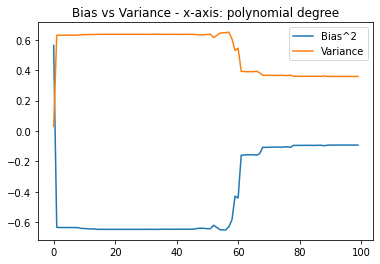

In [66]:
plt.plot(exps,np.array(bias_2_array),label="Bias^2")
plt.plot(exps,np.array(vars_array),label="Variance")
plt.title("Bias vs Variance - x-axis: polynomial degree")
plt.legend(loc="upper right")
plt.show()